# <center> Project 1 - Unsupervised Learning Classification</center>
## <center> Due: Oct 15$^{th}$ 11:59 PM</center>

In this project, we are going to implement models. Unfortunately, the data set, `CS559_Fall21_Project1_02.csv`, is not labeled except the target, `Class`, and therefore, we can not straightly use supervised leanring algorithms until we learn about data - using unsupervised learning techniques in preprocessing is essential. To build models, we are allowed to use any of provided modules and libraries. **The exploratory and feature engineerings are required but not limited - all your work and process must be justified and explained in notebook.**

### Models:
- You are going to build three different classifiers using KMeans, K Nearest Neighbor (KNN), and Logistic Regression. 
    - KMeans: KMeans arbitrary use ID indices. Cluster ID indicates the subgroup number each observation belongs to and **it does not neccessary need to have the same ID as the target ID**. The task is to check whether the model clusters and subgroups each observation to the same classes. Then perform data preprocessing in order to subgroup observations correctly as much as possible. In order to check the accuracy of clustering, the cluster IDs  may need to be **relabeled** to match with their subgroup `Class` IDs. 
    - KNN: The accuracy of KNN will likely to decrease as k value increases. The task is to determine the threshold of k value reaches to **95%**. 
    - Logistic Regression: There are several assumptions/conditions needed in order for Logistic Regression to perform well. The task is to EDA to verify if the data is suitable for Logistic Regression and perform data preprocessing to raise the accuracy of model as high as possible. When the model was applied to the raw data, the accuracy was around 35%. 
- In this project, we are not interested in optimizing the models by tunning hyperparameters. Therefore, validation and testing are not necessary. Use the entire dataset as a train data set.     
- Accuracy Report: The accuracy is the accuracy of trained model (remember that we do not split the data set). The accuracy must be reported in Data Frame format as an example shown below. When you report the accuracy of models, please provide the name of algorithms, number of features used, and the accuracy in percentile. 
|Model Number | Algorithm (s)| Number of features | Accuracy (%)|
|---|---|---|---|
| 0 | Logistic Regression | 3 | 35%|
| 1 | KMeans | -- | -- |
| 2 | KNN | -- | -- |
| 3 | Logistic Regression | -- | -- |

### Grade Scheme: 

| Components | Maximum Points |
| --- | --- |
| Effort (cleanness, completeness, etc)| 20 |
| EDA and Feature Engineering (w/ visualizations) | 20 |
| Modeling | 20 |
| Explanation (w/ visualizations) | 20 |
| Result | 20 |


### Submission:
- No formal report. However, all work (EDA, Preprocessing, Modeling) must be **explained and summarized** at the end of each model, not in the middle of implementations. 
- Submit the notebook and its exported HTML files. 
- Considering the working period of the project, **NO LATE SUBMISSIONS ARE ACCEPTED**. 
- No resubmissions due to incorrect files, corrections, etc. 

#### Below, the libraries needed for this project are provided and plotting in 2-D and 3-D are also provided. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
def plot_2D(df,comp1,comp2,target):
    sns.scatterplot(x=comp1,y=comp2,data=df,hue=target)

def plot_3D(df, comp1,comp2,comp3,target):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[comp1],df[comp2],df[comp3],c=df[target])
    ax.set_xlabel(comp1)
    ax.set_ylabel(comp2)
    ax.set_zlabel(comp3)
    plt.show()

In [3]:
original_df = pd.read_csv('./CS559_Fall21_Project1_02.csv')

In [4]:
original_df.head(5)

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class
0,0,9.4202,-4.3507,10.3764,0.66768,0.33387,0.33355,0.33399,0.33367,0.33391,1
1,1,9.7044,-4.4601,10.6803,0.66749,0.33360,0.33352,0.33345,0.33363,0.33395,1
2,2,9.8075,-4.0894,10.6259,0.66742,0.33347,0.33315,0.33301,0.33364,0.33364,1
3,3,9.2771,-4.0349,10.1166,0.66782,0.33322,0.33394,0.33379,0.33380,0.33391,1
4,4,9.6447,-3.5968,10.2936,0.66768,0.33391,0.33301,0.33306,0.33326,0.33329,1


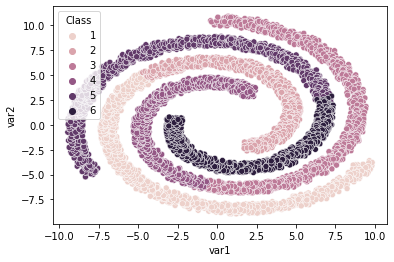

In [5]:
plot_2D(original_df,'var1', 'var2','Class')

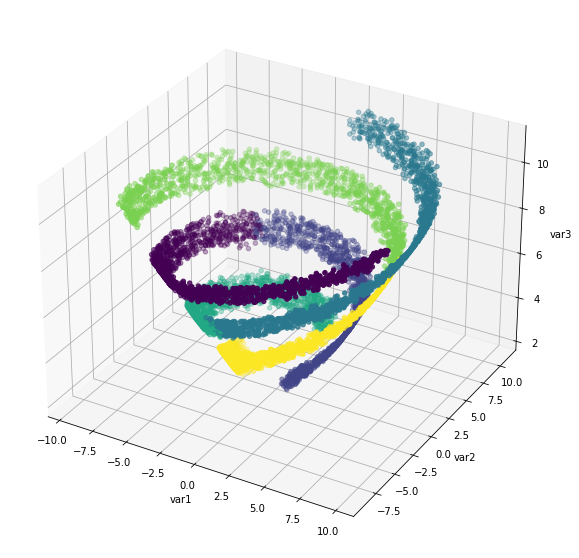

In [6]:
plot_3D(original_df,'var1','var2','var3','Class')

### Helper Functions

In [18]:
def elbow_method(features, k):
    inertia_values = []
    k_list = list(range(1, k+1))
    for i in k_list:
        k_mean = KMeans(n_clusters = i)
        k_mean.fit(features)
        inertia = k_mean.inertia_
        inertia_values.append(inertia)
        print(f'Fitting KMeans with k = {i} | Intertia = {inertia}', end = '\r')
        
    plt.plot(k_list, inertia_values, marker = 'o')
    plt.title('Elbow Method for different n_clusters')
    plt.xlabel(f'n_cluster')
    plt.ylabel(f'Inertia')
    plt.show()

def get_metrics(y_predict, y_true, title = False): 
    accuracy = accuracy_score(y_true, y_predict)
    precision, recall, f1score, support = precision_recall_fscore_support(y_true, y_predict, average='macro')
    if title:
        cm = confusion_matrix(y_true, y_predict)
        print(classification_report(y_true, y_predict))
        ax = plt.subplot()
        sns.heatmap(cm, annot = True, fmt = '.1f', ax = ax)
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')
        ax.set_title(title)
        plt.show()
    return accuracy, precision, recall, f1score, support

def get_pca_components(X):
    y = []
    n_components = X.shape[-1]
    
    pca = PCA(n_components = n_components)
    pca.fit(X)
    y = np.cumsum(pca.explained_variance_ratio_)
    list_components = list(range(1, n_components + 1))
    plt.plot(list_components, y, marker = 'o')
    plt.axhline(y = .95, color = 'r', linestyle = '-')
    plt.title('PCA Variance vs. n_components')
    plt.xlabel('n_components')
    plt.ylabel('Cumulative Variance')
    plt.show()
    
def map_kmeans_predict(modeling_df):
    unique_clusters = modeling_df.k_means_predict.unique()
    cluster_map_dict = {}
    for cluster in unique_clusters:
        subset_df = modeling_df[modeling_df.k_means_predict == cluster]
        target = subset_df.Class.value_counts().sort_values(ascending = False).index[0]
        cluster_map_dict[cluster] = target
    mapped_predictions = modeling_df.k_means_predict.map(lambda x: cluster_map_dict[x]) #now k_cluster_mapped will correspond the target variable
    return mapped_predictions.values, cluster_map_dict

def get_vif_df(df): 
    return pd.DataFrame(np.linalg.inv(df.corr().values), index = df.corr().index, columns = df.columns)

def graph_hist(df):
    df.hist(bins = 50, figsize = (15,10))
    plt.show()

def graph_box_plot(df):
    fig, ax = plt.subplots(1, len(df.columns), figsize = (25, 5))
    for idx, c in enumerate(df.columns):
        ax[idx].boxplot(df[c])
        ax[idx].set_xlabel(c)
    plt.show() 

def graph_correlation(df):
    fig, ax = plt.subplots(1, figsize = (15,5))
    df_corr = df.corr()
    sns.heatmap(df_corr, xticklabels = df_corr.columns, yticklabels = df_corr.columns, annot = True, 
               fmt = '.2f', ax = ax)
    plt.show()

def get_knn_neighbors(X, y, max_n = 20):
    metrics_dict = {
        'accuracy': [], 
        'precision': [], 
        'recall': [], 
        'f1_score': []
    }
    neighbors_list = list(range(1, max_n))
    for neighbor in neighbors_list:
        knn = KNeighborsClassifier(n_neighbors = neighbor)
        knn.fit(X, y.ravel())
        y_predict = knn.predict(X)
        accuracy, precision, recall, f1score, support = get_metrics(y_predict, y.ravel())
        metrics_dict['accuracy'].append(accuracy); metrics_dict['recall'].append(recall)
        metrics_dict['f1_score'].append(f1score); metrics_dict['precision'].append(precision)
        print(f'Testing n_neighbors = {neighbor} | Accuracy = {accuracy}', end = '\r')
#     x_point = np.interp(.95, neighbors_list, metrics_dict['accuracy'])
    metrics_dict['accuracy'] = np.array(metrics_dict['accuracy'])
    neighbors_list = np.array(neighbors_list)
    y_point = metrics_dict['accuracy'][np.isclose(neighbors_list, 2)]
    x_point = neighbors_list[np.where(metrics_dict['accuracy'] == y_point)]
    y_point = metrics_dict['accuracy'].min()
    print('\n', x_point)
    for k, l in metrics_dict.items():
        plt.plot(neighbors_list, l, label = k)
    plt.title('Metrics vs. n_neighbors')
    plt.xlabel('n_neighbors')
    plt.ylabel('metrics')
#     plt.axhline(y = .95, color = 'r', linestyle = '-')
    plt.annotate(f"Accuracy = .95 | n_neighbors = {x_point}", (x_point, y_point), ha = 'center')
    plt.legend()
    
    plt.show()

In [19]:
train_size = .8 
train_pieces = []
test_pieces = []
for c in original_df.Class.unique():
    subset_df = original_df[original_df.Class == c].values
    train_len = int(len(subset_df) * train_size)
    test_len = len(subset_df) - train_len
    np.random.shuffle(subset_df); np.random.shuffle(subset_df)
    subset_df = pd.DataFrame(subset_df, columns = original_df.columns)
    train_piece = subset_df[:train_len]
    test_piece = subset_df[train_len:]
    test_pieces.append(test_piece)
    train_pieces.append(train_piece)
    
    
train_df, test_df = pd.concat(train_pieces), pd.concat(test_pieces)

print(f'Train Target Distribution')
print(train_df.Class.value_counts())
print('~' * 50)
print(f'Test Target Distribution')
print(test_df.Class.value_counts())

Train Target Distribution
6.0    1000
4.0    1000
2.0    1000
5.0     999
3.0     999
1.0     999
Name: Class, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test Target Distribution
6.0    251
4.0    251
2.0    251
5.0    250
3.0    250
1.0    250
Name: Class, dtype: int64


### Project 1 Starts from here

#### Model 1: KMeans

##### EDA / Preprocessing

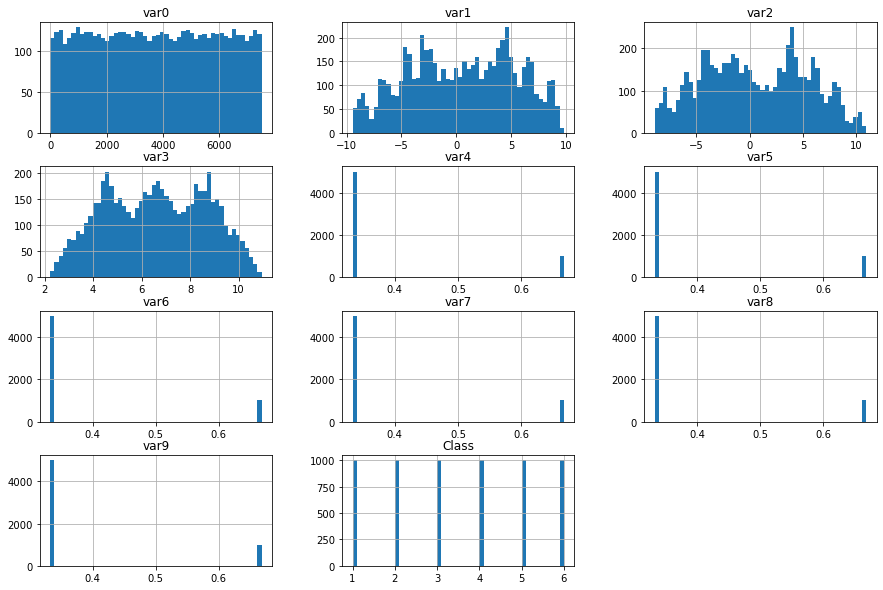

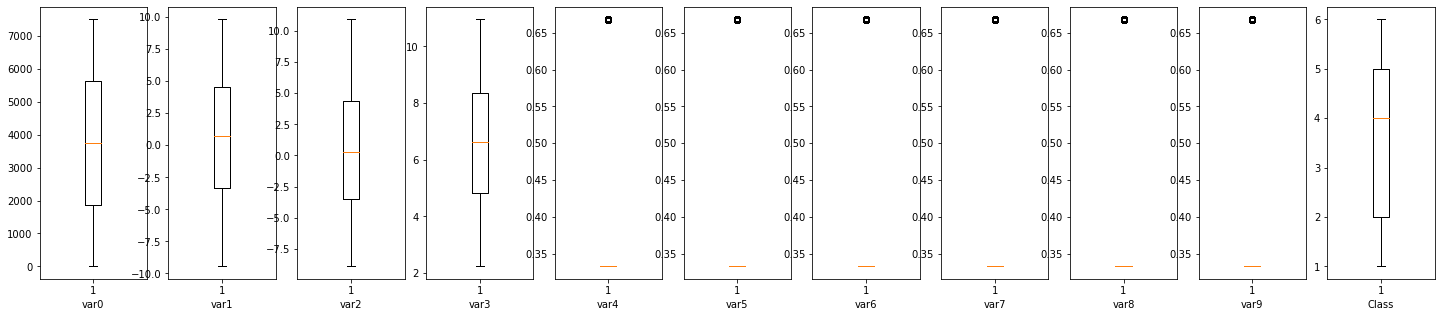

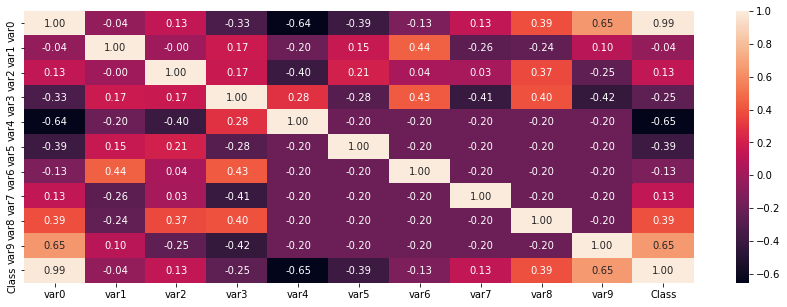

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class
var0,408.837126,-24.081352,-19.162264,130.037846,20.013051,90.877889,8.752583,76.779283,-13.117263,65.624363,-366.640994
var1,-24.081352,3.043148,1.246857,-8.379853,-10.206870,-13.089405,-6.024973,-7.411193,0.486021,-2.878622,11.641247
var2,-19.162264,1.246857,2.481903,-6.669620,2.178313,-2.890048,0.859199,-3.297325,0.211380,-3.738000,20.130035
var3,130.037846,-8.379853,-6.669620,45.333153,7.417708,31.627461,2.516912,25.792443,-6.021577,20.960229,-113.354263
var4,20.013051,-10.206870,2.178313,7.417708,96043.070128,71988.138003,47877.736580,23791.173226,-310.299114,-24397.822814,110383.521761
var5,90.877889,-13.089405,-2.890048,31.627461,71988.138003,54026.383401,35989.579388,18001.268307,-29.560752,-18016.323029,82430.185813
var6,8.752583,-6.024973,0.859199,2.516912,47877.736580,35989.579388,24075.167627,12168.881400,257.768605,-11647.563175,54555.554433
var7,76.779283,-7.411193,-3.297325,25.792443,23791.173226,18001.268307,12168.881400,6370.841567,537.987960,-5259.085969,26567.910300
var8,-13.117263,0.486021,0.211380,-6.021577,-310.299114,-29.560752,257.768605,537.987960,826.019658,1104.938930,-1288.164705
var9,65.624363,-2.878622,-3.738000,20.960229,-24397.822814,-18016.323029,-11647.563175,-5259.085969,1104.938930,7497.275785,-29287.586624


In [20]:
##### EDA / Preprocessing starts here
k_means_df = train_df.copy()  

graph_hist(k_means_df)

graph_box_plot(k_means_df)

graph_correlation(k_means_df)

vif_df = get_vif_df(k_means_df)
vif_df

##### Model Implementation

1503


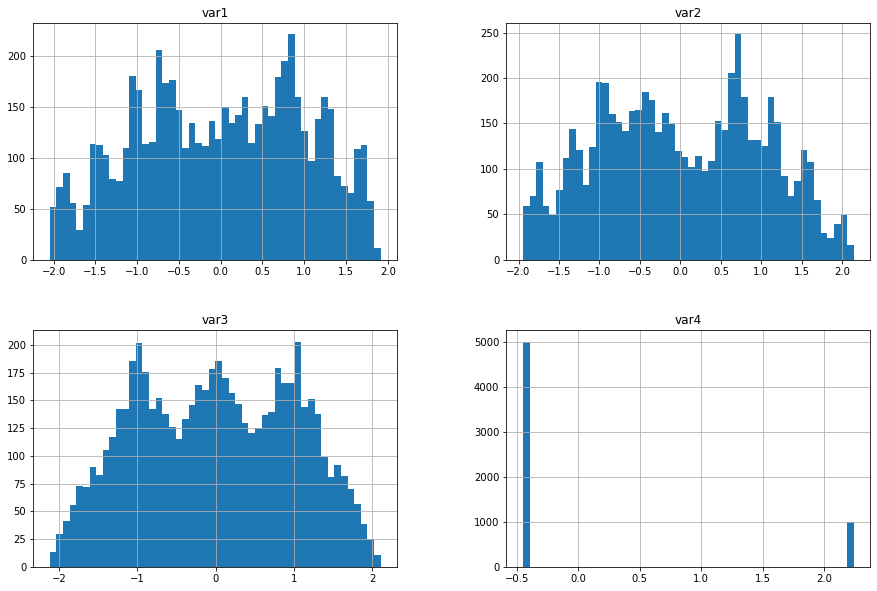

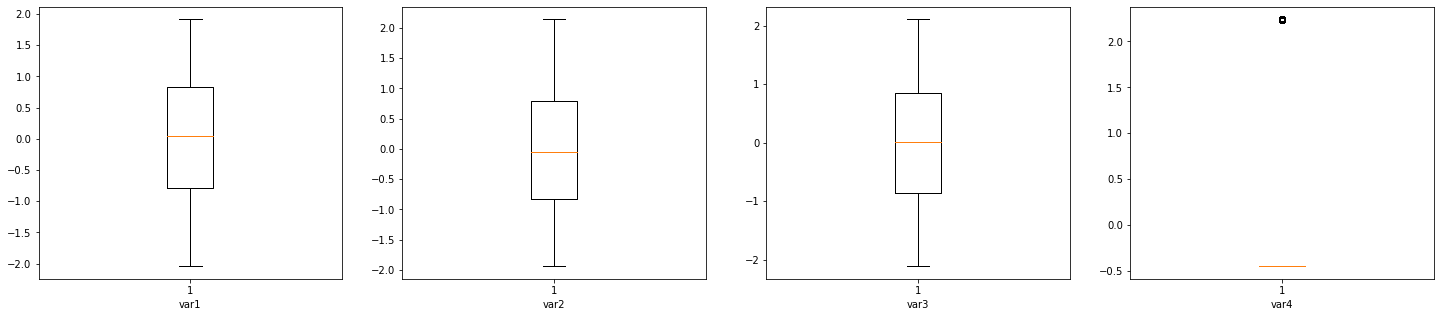

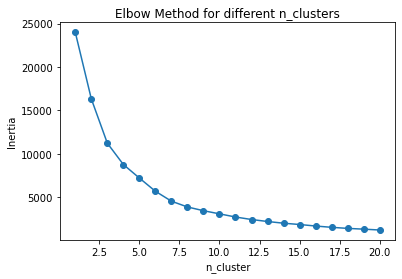

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       999
         2.0       0.80      0.99      0.88      1000
         3.0       0.99      0.96      0.98       999
         4.0       0.96      1.00      0.98      1000
         5.0       0.95      1.00      0.97       999
         6.0       0.99      0.68      0.81      1000

    accuracy                           0.94      5997
   macro avg       0.95      0.94      0.94      5997
weighted avg       0.95      0.94      0.94      5997



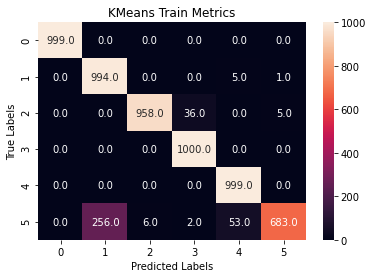

1503 1503
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       250
         2.0       0.79      1.00      0.88       251
         3.0       0.99      0.96      0.98       250
         4.0       0.97      1.00      0.98       251
         5.0       0.95      1.00      0.97       250
         6.0       0.99      0.68      0.81       251

    accuracy                           0.94      1503
   macro avg       0.95      0.94      0.94      1503
weighted avg       0.95      0.94      0.94      1503



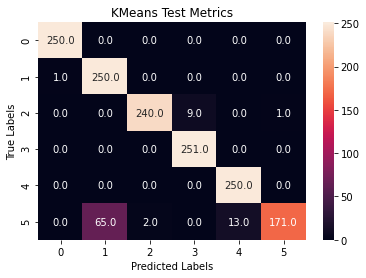

In [25]:
##### Model Implementation starts here
features = ['var1', 'var2', 'var3', 'var4']
target = ['Class']
X = k_means_df[features]
X_test = test_df[features]
y = k_means_df[target]
y_test = test_df[target]
print(len(y_test))
X_scaled = pd.DataFrame() 
X_scaled_test = pd.DataFrame()
for c in X.columns:
    sc = StandardScaler()
    X_scaled[c] = sc.fit_transform(X[c].values.reshape(-1,1)).ravel()
    X_scaled_test[c] = sc.transform(X_test[c].values.reshape(-1,1)).ravel() #transform test with train

graph_hist(X_scaled)

graph_box_plot(X_scaled)
elbow_method(X_scaled.values, 20)
k_means = KMeans(n_clusters = 20, random_state = 10)
k_means.fit(X_scaled)
y_train_predict = k_means.predict(X_scaled)
modeling_df = X_scaled.copy()
modeling_df['k_means_predict'] = y_train_predict
modeling_df['Class'] = y.values.ravel()
k_means_mapped, map_dict = map_kmeans_predict(modeling_df)
modeling_df['k_means_predict_mapped'] = k_means_mapped
km_train_accuracy, km_train_precision, km_train_recall, km_train_f1_score, _ = get_metrics(k_means_mapped, y, 
                                                                                      title = 'KMeans Train Metrics')
y_test_predict = k_means.predict(X_scaled_test.values)
y_test_predict = [map_dict[i] for i in y_test_predict]

print(len(y_test_predict), len(y_test))
km_test_accuracy, km_test_precision, km_test_recall, km_test_f1_score, _ = get_metrics(y_test_predict, y_test, 
                                                                                  title = 'KMeans Test Metrics')

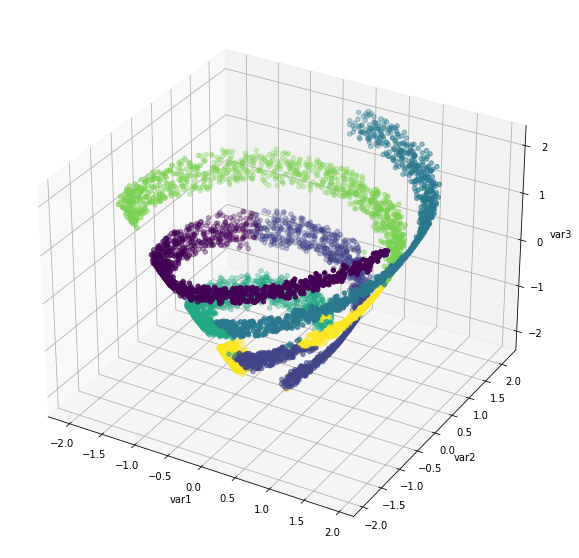

In [27]:
plot_3D(modeling_df, 'var1', 'var2', 'var3', 'k_means_predict_mapped')

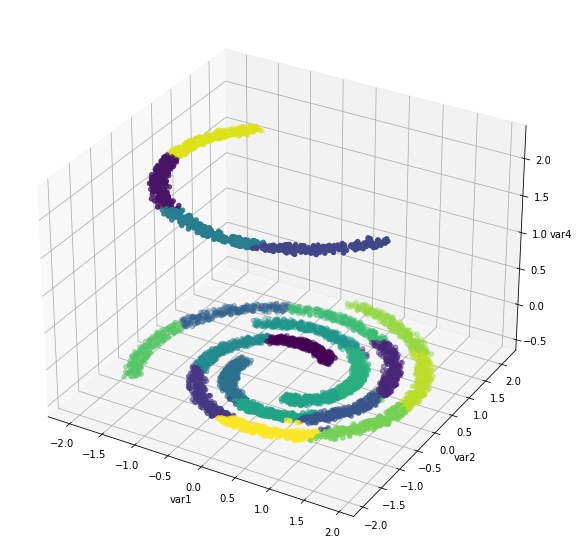

In [28]:
plot_3D(modeling_df, 'var1', 'var2', 'var4', 'k_means_predict')

##### Summary:

#### Model 2: KNN

##### EDA / Preprocessing

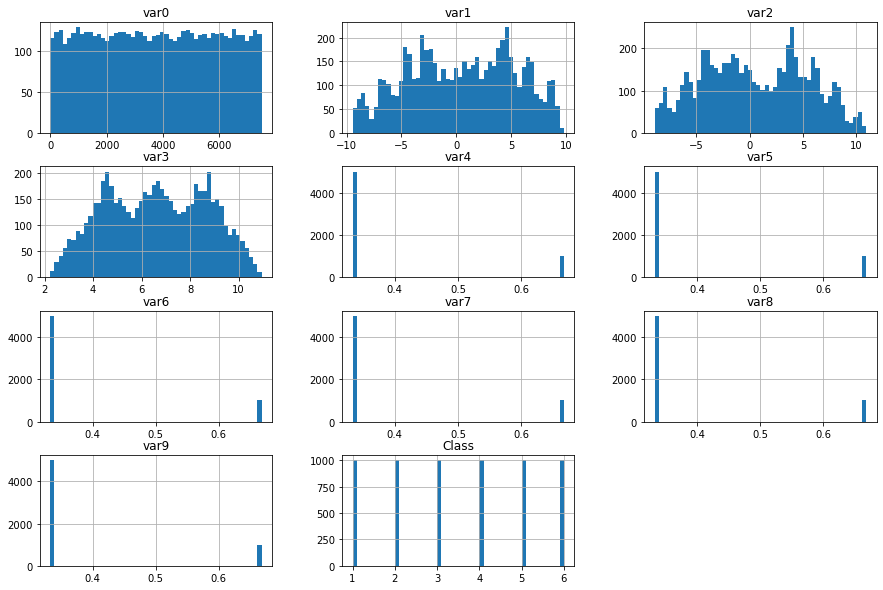

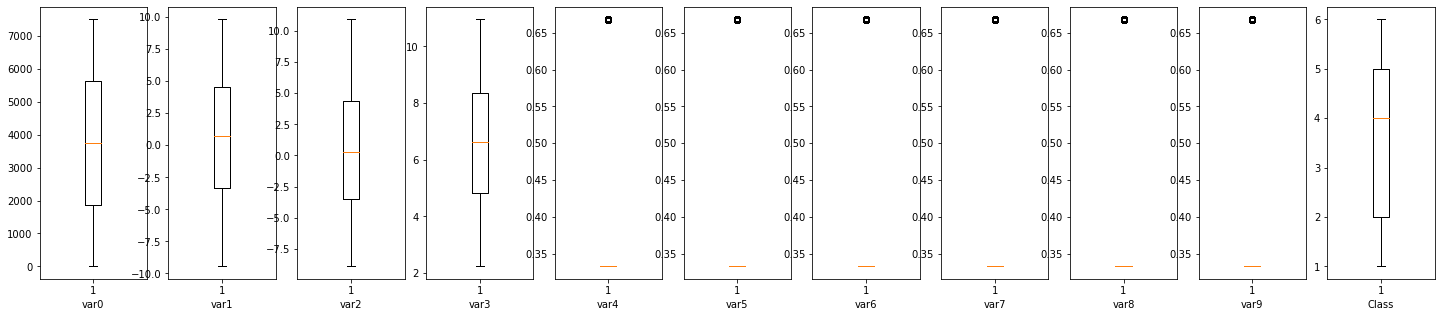

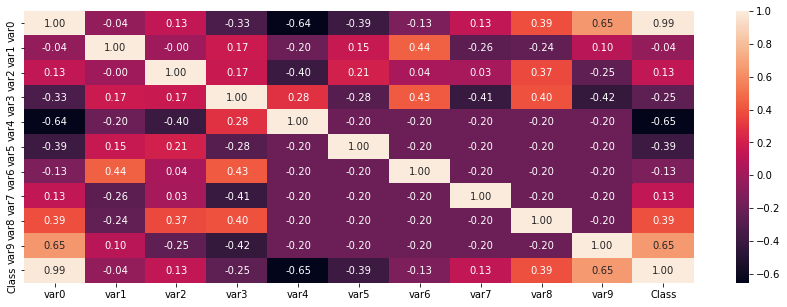

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class
var0,408.837126,-24.081352,-19.162264,130.037846,20.013051,90.877889,8.752583,76.779283,-13.117263,65.624363,-366.640994
var1,-24.081352,3.043148,1.246857,-8.379853,-10.206870,-13.089405,-6.024973,-7.411193,0.486021,-2.878622,11.641247
var2,-19.162264,1.246857,2.481903,-6.669620,2.178313,-2.890048,0.859199,-3.297325,0.211380,-3.738000,20.130035
var3,130.037846,-8.379853,-6.669620,45.333153,7.417708,31.627461,2.516912,25.792443,-6.021577,20.960229,-113.354263
var4,20.013051,-10.206870,2.178313,7.417708,96043.070128,71988.138003,47877.736580,23791.173226,-310.299114,-24397.822814,110383.521761
var5,90.877889,-13.089405,-2.890048,31.627461,71988.138003,54026.383401,35989.579388,18001.268307,-29.560752,-18016.323029,82430.185813
var6,8.752583,-6.024973,0.859199,2.516912,47877.736580,35989.579388,24075.167627,12168.881400,257.768605,-11647.563175,54555.554433
var7,76.779283,-7.411193,-3.297325,25.792443,23791.173226,18001.268307,12168.881400,6370.841567,537.987960,-5259.085969,26567.910300
var8,-13.117263,0.486021,0.211380,-6.021577,-310.299114,-29.560752,257.768605,537.987960,826.019658,1104.938930,-1288.164705
var9,65.624363,-2.878622,-3.738000,20.960229,-24397.822814,-18016.323029,-11647.563175,-5259.085969,1104.938930,7497.275785,-29287.586624


In [32]:
##### EDA / Preprocessing starts here
knn_df = train_df.copy()
graph_hist(knn_df)

graph_box_plot(knn_df)

graph_correlation(knn_df)

vif_df = get_vif_df(knn_df)
vif_df

PCA Features: ['var4', 'var5', 'var6', 'var8']


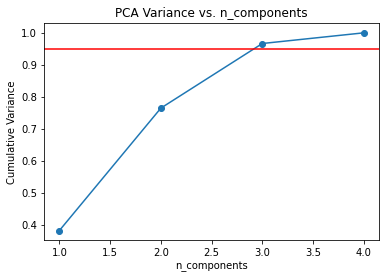

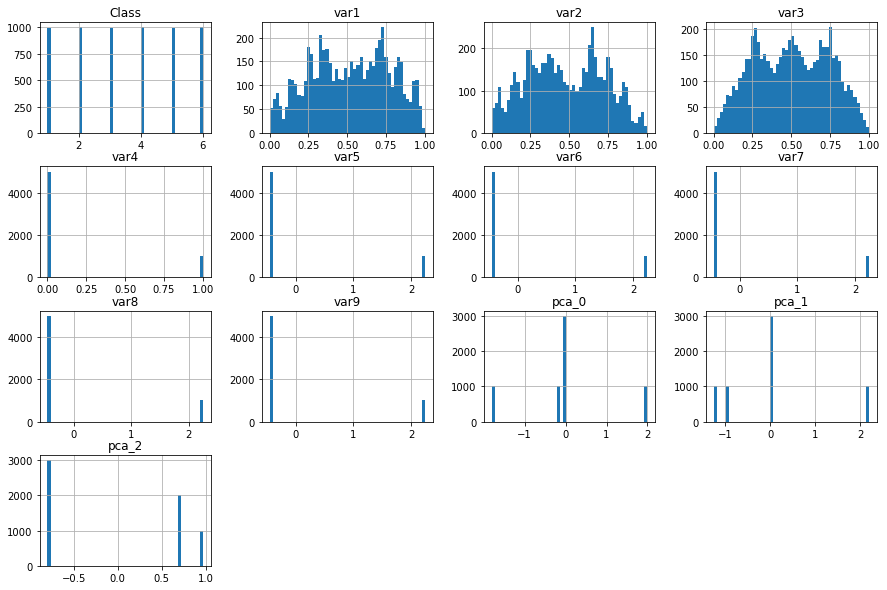

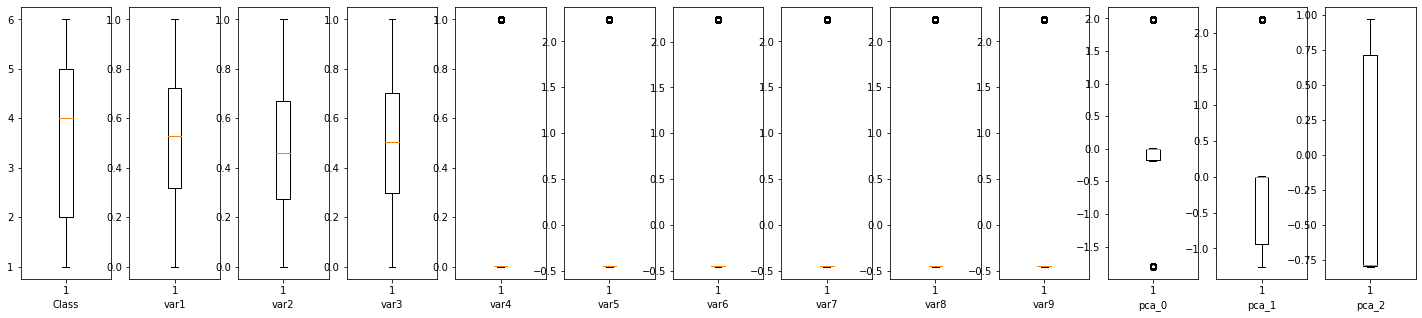

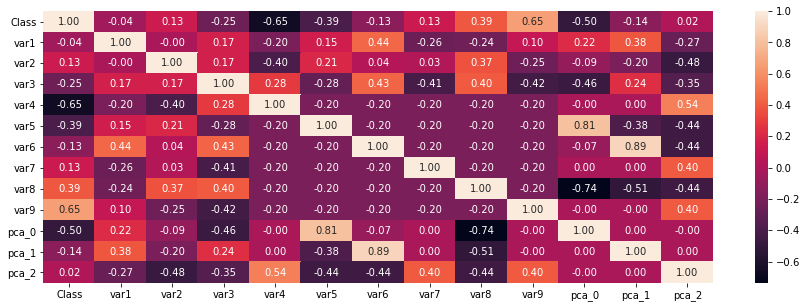

,Class,var1,var2,var3,var4,var5,var6,var7,var8,var9,pca_0,pca_1,pca_2
Class,127991.358400,-9.954665,2.945511,3.262360,1.201728e+05,-3.134884e+04,-2.834348e+04,26636.765152,2.007619e+04,-29228.735331,1.017541e+05,4.118253e+04,-8.326308e+04
var1,-9.954665,1.624707,0.118160,-0.720355,-9.977532e+00,2.789213e+00,2.587667e+00,-2.888735,-1.875604e+00,0.986789,-9.089292e+00,-3.997727e+00,8.087630e+00
var2,2.945511,0.118160,1.583764,-0.574724,3.288743e+00,-6.124603e-01,-6.084833e-01,0.301332,3.539543e-01,-0.662175,2.032255e+00,1.304461e+00,-1.471496e+00
var3,3.262360,-0.720355,-0.574724,3.972326,1.099367e+00,-1.254939e+00,-1.827404e-01,1.371440,1.184729e+00,0.087245,5.442972e+00,-5.777202e-02,-4.152298e-01
var4,120107.354356,-9.970898,3.286721,1.096976,-3.503699e+11,-3.549116e+12,3.410125e+12,25957.423034,6.428831e+12,-26467.540314,7.846672e+12,-1.130454e+12,2.985805e+12
var5,-31895.061671,2.830296,-0.623386,-1.285969,-3.622268e+12,4.755953e+13,8.531627e+10,-6729.756431,1.736335e+13,7191.826314,-2.565985e+13,2.696355e+13,3.086371e+13
var6,-27772.637701,2.545487,-0.594257,-0.183977,3.422083e+12,-2.526451e+11,-6.394693e+13,-5998.896764,2.760218e+12,6123.342208,-2.400431e+12,5.831637e+13,-2.916356e+13
var7,26636.765152,-2.888735,0.301332,1.371440,2.597179e+04,-6.619028e+03,-6.122968e+03,6356.422472,4.225236e+03,-5271.410165,2.127258e+04,8.758559e+03,-1.861342e+04
var8,21226.559276,-1.984744,0.394453,1.272547,6.490035e+12,1.638828e+13,2.636844e+12,4469.859076,-1.355093e+14,-4795.165776,-1.127705e+14,-6.497506e+13,-5.530139e+13
var9,-29228.735331,0.986789,-0.662175,0.087245,-2.648174e+04,7.064141e+03,6.248440e+03,-5271.410165,-4.537675e+03,7486.742105,-2.314084e+04,-9.216613e+03,1.773000e+04


In [35]:
normal_standard_df = pd.DataFrame()
normal_standard_test = pd.DataFrame()
normal_standard_test['Class'] = test_df.Class
normal_standard_df['Class'] = knn_df.Class
for c in knn_df.columns:
    if c == 'var0': 
        continue
    elif c == 'Class':
#         normal_standard_df['Class'] = knn_df.Class.copy()
        continue
    if c in ['var1', 'var2', 'var3', 'var4']:
        sc = MinMaxScaler()
    else:
        sc = StandardScaler()
    normal_standard_df[c] = sc.fit_transform(knn_df[c].values.reshape(-1,1)).ravel()
    normal_standard_test[c] = sc.transform(test_df[c].values.reshape(-1,1)).ravel()
    
pca_feature_col = [f'var{i}' for i in [4, 5, 6, 8]]
print(f'PCA Features: {pca_feature_col}')
pca_features = normal_standard_df[pca_feature_col].values
pca_features_test = normal_standard_test[pca_feature_col].values
get_pca_components(pca_features)
pca = PCA(n_components = .9)
pca_transformed = pca.fit_transform(pca_features)
pca_test_transformed = pca.transform(pca_features_test)
for idx in range(pca_transformed.shape[-1]):
    normal_standard_df[f'pca_{idx}'] = pca_transformed[:,idx]
    normal_standard_test[f'pca_{idx}'] = pca_test_transformed[:, idx]
    
graph_hist(normal_standard_df)

graph_box_plot(normal_standard_df)

graph_correlation(normal_standard_df)

vif_df = get_vif_df(normal_standard_df)
vif_df

##### Model Implementation

Features for Training ['var3', 'pca_0', 'pca_1', 'pca_2']
Testing n_neighbors = 4 | Accuracy = 0.9366349841587462
 [2]


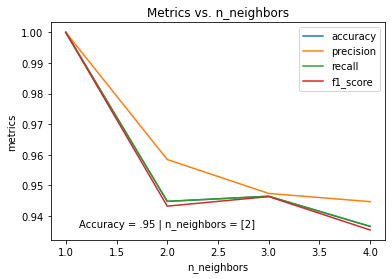

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       999
         2.0       1.00      1.00      1.00      1000
         3.0       1.00      1.00      1.00       999
         4.0       0.75      1.00      0.86      1000
         5.0       1.00      1.00      1.00       999
         6.0       1.00      0.67      0.80      1000

    accuracy                           0.94      5997
   macro avg       0.96      0.94      0.94      5997
weighted avg       0.96      0.94      0.94      5997



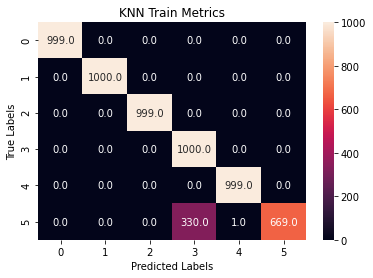

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       250
         2.0       1.00      1.00      1.00       251
         3.0       1.00      1.00      1.00       250
         4.0       0.67      0.90      0.77       251
         5.0       1.00      1.00      1.00       250
         6.0       0.85      0.55      0.67       251

    accuracy                           0.91      1503
   macro avg       0.92      0.91      0.91      1503
weighted avg       0.92      0.91      0.91      1503



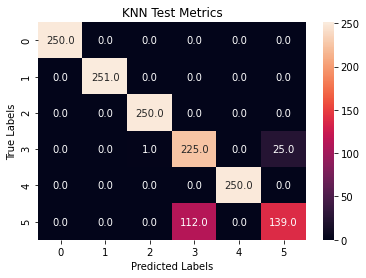

In [39]:
##### Model Implementation starts here
features = ['var3'] + [i for i in normal_standard_df.columns if 'pca' in i]
print('Features for Training', features)
target = ['Class']
X = normal_standard_df[features].values 
X_test = normal_standard_test[features].values
y_test = normal_standard_test[target].values
y = normal_standard_df[target].values
get_knn_neighbors(X, y, max_n = 5)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X, y.ravel())
predict_y = knn.predict(X)
knn_train_accuracy, knn_train_precision, knn_train_recall, knn_train_f1_score, _ = get_metrics(predict_y, 
                                                                               y, title = 'KNN Train Metrics') 

y_test_predict = knn.predict(X_test)
knn_test_accuracy, knn_test_precision, knn_test_recall, knn_test_f1_score, _ = get_metrics(y_test_predict,
                                                                         y_test, title = 'KNN Test Metrics') 

#### Summary:

#### Model 3: Logistic Regression

##### EDA / Preprocessing

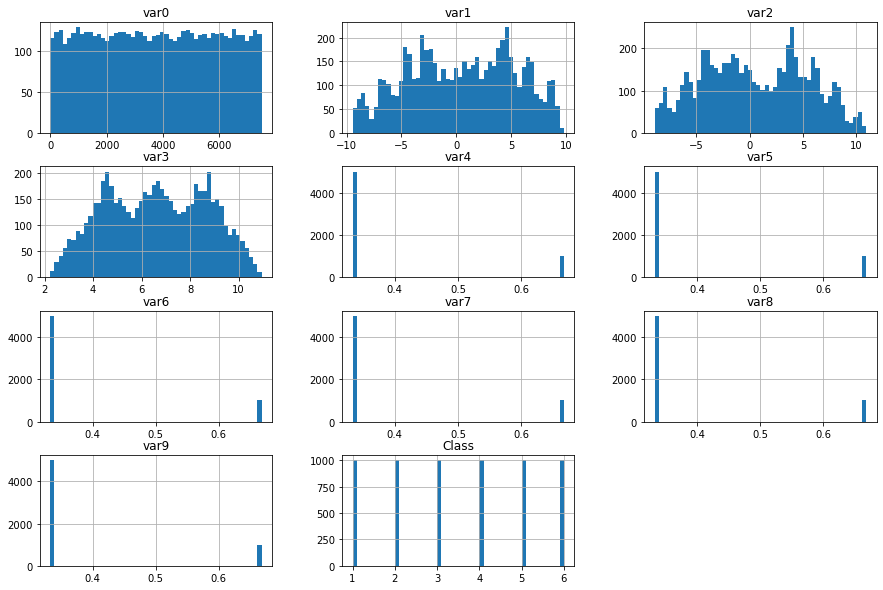

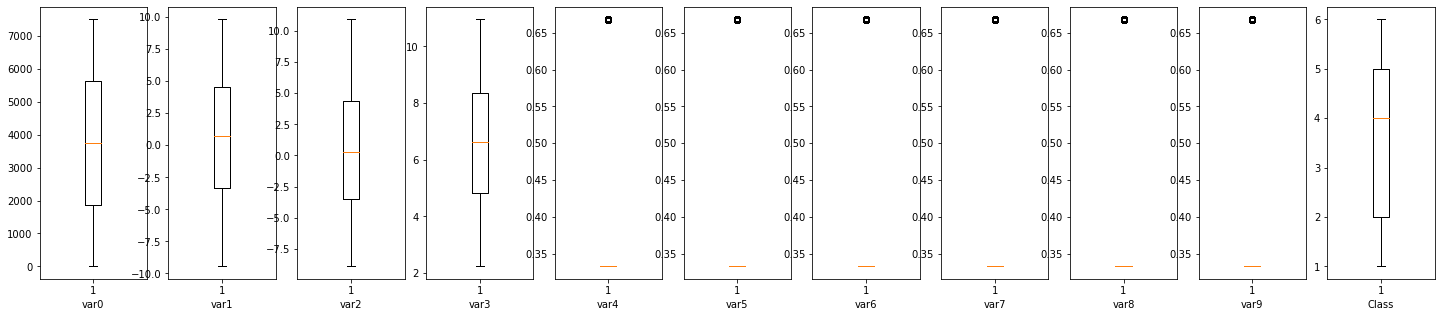

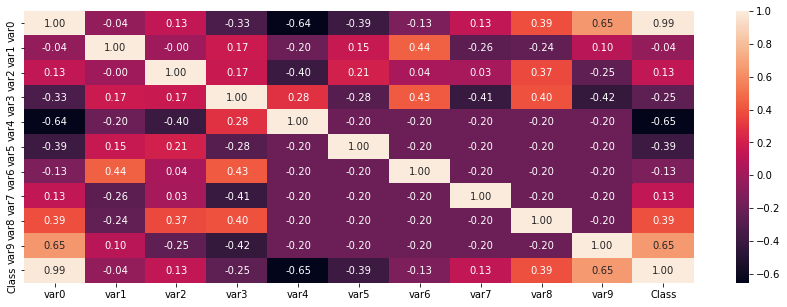

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class
var0,408.837126,-24.081352,-19.162264,130.037846,20.013051,90.877889,8.752583,76.779283,-13.117263,65.624363,-366.640994
var1,-24.081352,3.043148,1.246857,-8.379853,-10.206870,-13.089405,-6.024973,-7.411193,0.486021,-2.878622,11.641247
var2,-19.162264,1.246857,2.481903,-6.669620,2.178313,-2.890048,0.859199,-3.297325,0.211380,-3.738000,20.130035
var3,130.037846,-8.379853,-6.669620,45.333153,7.417708,31.627461,2.516912,25.792443,-6.021577,20.960229,-113.354263
var4,20.013051,-10.206870,2.178313,7.417708,96043.070128,71988.138003,47877.736580,23791.173226,-310.299114,-24397.822814,110383.521761
var5,90.877889,-13.089405,-2.890048,31.627461,71988.138003,54026.383401,35989.579388,18001.268307,-29.560752,-18016.323029,82430.185813
var6,8.752583,-6.024973,0.859199,2.516912,47877.736580,35989.579388,24075.167627,12168.881400,257.768605,-11647.563175,54555.554433
var7,76.779283,-7.411193,-3.297325,25.792443,23791.173226,18001.268307,12168.881400,6370.841567,537.987960,-5259.085969,26567.910300
var8,-13.117263,0.486021,0.211380,-6.021577,-310.299114,-29.560752,257.768605,537.987960,826.019658,1104.938930,-1288.164705
var9,65.624363,-2.878622,-3.738000,20.960229,-24397.822814,-18016.323029,-11647.563175,-5259.085969,1104.938930,7497.275785,-29287.586624


In [47]:
##### EDA / Preprocessing starts here
log_df = train_df.copy()
graph_hist(log_df)

graph_box_plot(log_df)

graph_correlation(log_df)

vif_df = get_vif_df(log_df)
vif_df

##### Model Implementation

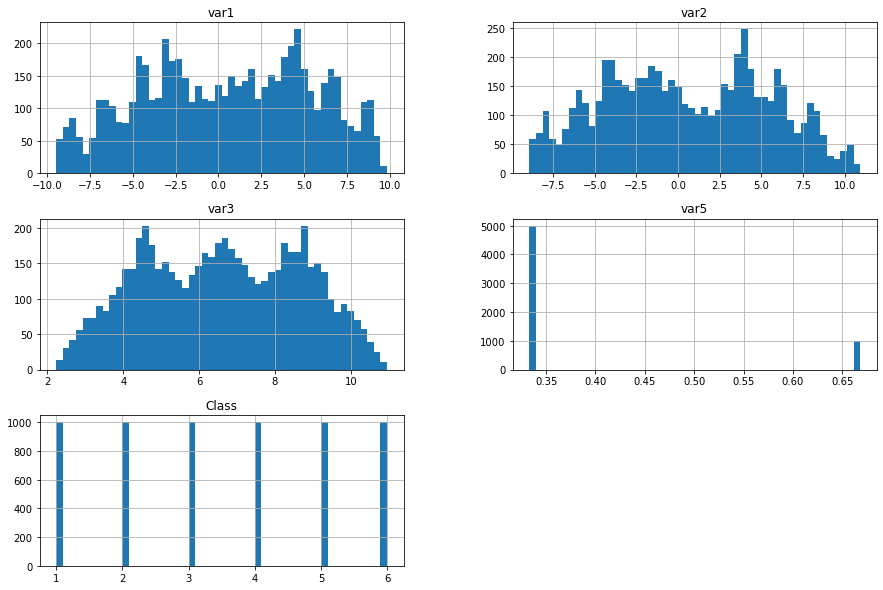

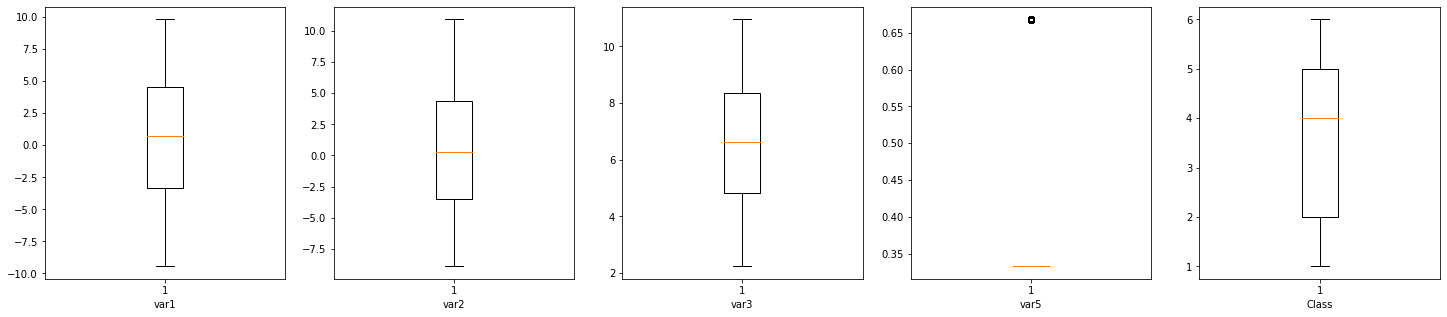

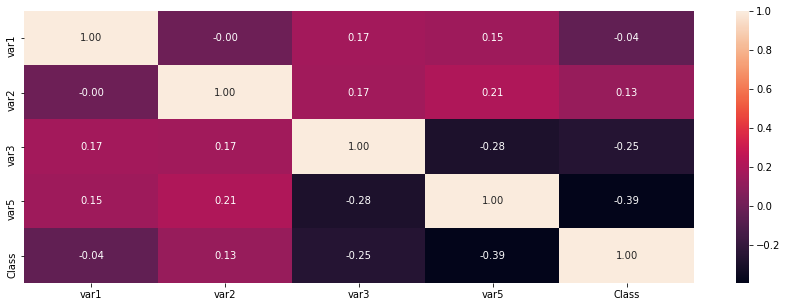

,var1,var2,var3,var5,Class
var1,1.122943,0.191014,-0.403326,-0.423937,-0.246304
var2,0.191014,1.333455,-0.611939,-0.720462,-0.607265
var3,-0.403326,-0.611939,1.683960,1.018650,0.889773
var5,-0.423937,-0.720462,1.018650,1.936104,1.095974
Class,-0.246304,-0.607265,0.889773,1.095974,1.725754


In [65]:
##### Model Implementation starts here
features = ['var1', 'var2', 'var3', 'var5']
target = ['Class']
modeling_df = log_df[features + target]
X = log_df[features]
X_test = test_df[features]
y_test = test_df[target]

graph_hist(modeling_df)

graph_box_plot(modeling_df)

graph_correlation(modeling_df)

vif_df = get_vif_df(modeling_df)
vif_df


/home/samuel-linux/anaconda3/envs/Dash-Dab-Tlt/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/samuel-linux/anaconda3/envs/Dash-Dab-Tlt/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.64      0.64      0.64       999
         2.0       1.00      1.00      1.00      1000
         3.0       0.58      0.61      0.59       999
         4.0       0.89      0.88      0.89      1000
         5.0       0.62      0.61      0.61       999
         6.0       0.87      0.87      0.87      1000

    accuracy                           0.77      5997
   macro avg       0.77      0.77      0.77      5997
weighted avg       0.77      0.77      0.77      5997



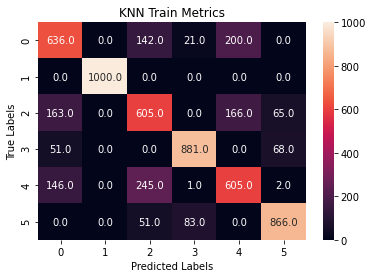

              precision    recall  f1-score   support

         1.0       0.60      0.62      0.61       250
         2.0       1.00      1.00      1.00       251
         3.0       0.56      0.58      0.57       250
         4.0       0.93      0.87      0.90       251
         5.0       0.64      0.62      0.63       250
         6.0       0.86      0.88      0.87       251

    accuracy                           0.76      1503
   macro avg       0.77      0.76      0.76      1503
weighted avg       0.77      0.76      0.76      1503



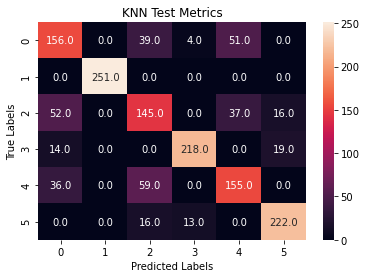

In [66]:
X_scaled = X.copy() #normal_standard_df[features]
X_scaled_test = X_test.copy() #normal_standard_test[features]
y = log_df[target]
log = LogisticRegression()
log.fit(X_scaled, y)
y_predict = log.predict(X_scaled)
y_test_predict = log.predict(X_scaled_test)
log_train_accuracy, log_train_precision, log_train_recall, log_train_f1_score, _ = get_metrics(y_predict, 
                                                                               y, title = 'KNN Train Metrics') 

log_test_accuracy, log_test_precision, log_test_recall, log_test_f1_score, _ = get_metrics(y_test_predict,
                                                                         y_test, title = 'KNN Test Metrics')

##### Summary:

### EDA

- In order to fit features using LogisticRegression, we first ensured that there was no **multicollinearity** between features. 
- **Correlation between features**
    - `var1` and `var6` are moderate-highly correlated (.44)
    - `var1` and `var7` are moderately correlated (-.26)
    - `var1` and `var8` are moderately correlated (-.25)
    - `var2` and `var4` are moderatley correlated (.44)
    - `var2` and `var8` are moderately correlated (.37)
    - `var2` and `var9` are moderately correlated (-.42)
    - `var3` and `var4` are moderately correlated (.29)
    - `var3` and `var5` are moderately correlated (-.29)
    - `var3` and `var6` are moderately-highly correlated (.43)
    - `var3` and `var7` are moderately-highly correlated (-.41)
    - `var3` and `var8` are moderately correlated (.4)
    - `var3` and `var9` are moderately correlated (-.42)
    - `[var5, var6, var7, var8, var9]` have equal correlation to each other (-.2)
- based on the correlation matrix and variation inflation factor (VIF) above, we used only columns `['var1', 'var2', 'var3', 'var5']`
- Because our feature space is small, it is not necessary to standardize our data to increase speeds.  If we were to use more columns, standardizing our data would allow for faster convergence in gradient descent

### Results

- **Train Results**
    - Using clustering gave almost perfect results on the train data.  
    - **_Accuracy_** = .966    $\frac{(TP + TN)}{(TP + FP + TN + FN)}$	
    - **_F1-Score_** = .97 $\frac{2 * Precision * Recall}{(Precision + Recall)}$
        - class1 = .97
        - class2 = .94
        - class3 = .94 
        - class4 = .96
        - class5 = .99
        - class6 = 1.0
    - **_Precision_** = .97 $\frac{TP}{(TP + FP)}$
        - class1 = .95
        - class2 = .93
        - class3 = .95 
        - class4 = .98
        - class5 = .99
        - class6 = 1.0
    - **_Recall_** = .97    $\frac{TP}{(TP + FN)}$
        - class1 = 1.0
        - class2 = .95
        - class3 = .93 
        - class4 = .95
        - class5 = .98
        - class6 = .99


### Final Result Table:

In the result table, show only the **best result** obtained in each model. If the dataset were splitted into train and test sets, report the average of accuracy of train and test sets. 

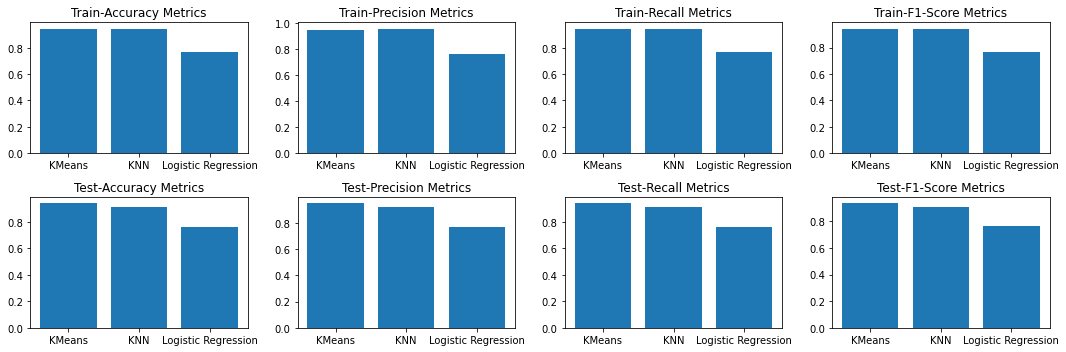

,Model,Algorithm,Number of Features,Train-Accuracy,Train-Precision,Train-Recall,Train-F1-Score,Test-Accuracy,Test-Precision,Test-Recall,Test-F1-Score
0,0,KMeans,4,93.93%,94.81%,93.93%,93.69%,93.95%,94.86%,93.95%,93.71%
1,1,KNN,4,94.48%,95.85%,94.48%,94.33%,90.82%,91.85%,90.84%,90.55%
2,2,Logistic Regression,4,76.59%,76.67%,76.58%,76.62%,76.31%,76.56%,76.28%,76.40%


In [68]:
final_metrics_df = {'Model': [0,1,2], 'Algorithm':['KMeans','KNN','Logistic Regression'],
           'Number of Features': [4, 4, 4],
           'Train-Accuracy':[km_train_accuracy, knn_train_accuracy, log_train_accuracy], 
          'Train-Precision': [km_train_precision, knn_train_precision, log_train_precision], 
          'Train-Recall': [km_train_recall, knn_train_recall, log_train_recall], 
          'Train-F1-Score': [km_train_f1_score, knn_train_f1_score, log_train_f1_score], 
           
        'Test-Accuracy':[km_test_accuracy, knn_test_accuracy, log_test_accuracy], 
          'Test-Precision': [km_test_precision, knn_test_precision, log_test_precision], 
          'Test-Recall': [km_test_recall, knn_test_recall, log_test_recall], 
          'Test-F1-Score': [km_test_f1_score, knn_test_f1_score, log_test_f1_score]}

final_metrics_df = pd.DataFrame(final_metrics_df, index = [0,1,2])

x = final_metrics_df.Algorithm
pos = np.arange(len(x))
fig, ax = plt.subplots(2, 4, figsize = (15,5))
subset = ['Train', 'Test']
for s in subset:
    columns = [i for i in final_metrics_df.columns if s in i]
    row = 0 if s == 'Train' else 1
    for idx, c in enumerate(columns):
        ax[row, idx].bar(x, final_metrics_df[c].values)
        ax[row, idx].set_title(f'{c} Metrics')
        final_metrics_df[c] = final_metrics_df[c].map(lambda x: f'{x * 100:.2f}%')
plt.tight_layout()
plt.show()
final_metrics_df